# Ward Results
A notebook for generating ward level data.

**Prerequisites**
* Download a subdivision shapefile for the place you want to analyse. For example, [GADM](https://gadm.org/data.html) provides level-4 administrative subdivisions for various countries.
    * In South Africa, level-4 subdivisions are wards ([ref](https://en.wikipedia.org/wiki/Administrative_divisions_of_South_Africa)).
* For South Africa specifically, the GADM boundaries are from 2011. To download more recent shapefiles, use the [Municipal Demarcation Board](https://dataportal-mdb-sa.opendata.arcgis.com/search?type=File%2520Geodatabase%2CShapefile) knowledge hub.

Download the shapefile into data > continent > country > shapefile.

In [2]:
from isapi.samples.redirector import excludes
# NB! Only run this once
%cd ..
%load_ext autoreload
%autoreload 2

C:\Users\emily\Documents\repos\south-africa-street-history-mapping


In [3]:
import glob
# Save to file
from pathlib import Path

import geopandas as gpd
from tqdm import tqdm

from mapping.map_e2e import process_polygon
from utils import HiddenPrint

In [4]:
# Constants
CONTINENT = 'africa'
COUNTRY = 'south-africa'
SHAPEFILE_DIR = f"data/{CONTINENT}/{COUNTRY}/shapefile"

# See keys in shapefile to determine what level you want to filter at. Here we are doing municipality
FILTER_KEY = 'Province'
FILTER_VALUE = 'Gauteng'

# The key on which to dissolve the boundaries to get an outline polygon
DISSOLVE_BOUNDARY_KEY = 'WardID'

# Output group folder
OUTPUT_SUB_FOLDER = FILTER_VALUE.lower()

In [5]:
shapefiles = glob.glob(f"{SHAPEFILE_DIR}/*.shp")
if len(shapefiles) <= 0:
    raise Exception(f"No shapefiles in path {SHAPEFILE_DIR}")

if len(shapefiles) > 1:
    raise Exception(f"Too many shapefiles in path {SHAPEFILE_DIR}")

shapefile_path = shapefiles[0]
shapefile_path

'data/africa/south-africa/shapefile\\SA_Wards2020.shp'

In [6]:
country_subdivisions = gpd.read_file(shapefile_path)
country_subdivisions[country_subdivisions['Province'] == 'Gauteng']

,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,geometry
2895,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,"POLYGON ((27.85070 -26.47969, 27.85068 -26.481..."
2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,2,City of Johannesburg,JHB,2020-11-26,79800002,JHB_2,"POLYGON ((27.88070 -26.49284, 27.88087 -26.493..."
2897,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,3,City of Johannesburg,JHB,2020-11-26,79800003,JHB_3,"POLYGON ((27.87042 -26.46787, 27.87059 -26.470..."
2898,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,4,City of Johannesburg,JHB,2020-11-26,79800004,JHB_4,"POLYGON ((27.86958 -26.44910, 27.86958 -26.449..."
2899,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,5,City of Johannesburg,JHB,2020-11-26,79800005,JHB_5,"POLYGON ((27.81010 -26.42435, 27.81439 -26.425..."
...,...,...,...,...,...,...,...,...,...,...
3419,Gauteng,Rand West City Local Municipality,GT485,31,West Rand,DC48,2020-11-26,74805031,GT485_31,"POLYGON ((27.70118 -26.27900, 27.69996 -26.279..."
3420,Gauteng,Rand West City Local Municipality,GT485,32,West Rand,DC48,2020-11-26,74805032,GT485_32,"POLYGON ((27.74465 -26.27949, 27.73847 -26.282..."
3421,Gauteng,Rand West City Local Municipality,GT485,33,West Rand,DC48,2020-11-26,74805033,GT485_33,"POLYGON ((27.72198 -26.23594, 27.72473 -26.238..."
3422,Gauteng,Rand West City Local Municipality,GT485,34,West Rand,DC48,2020-11-26,74805034,GT485_34,"POLYGON ((27.69489 -26.28297, 27.69489 -26.283..."


<Axes: >

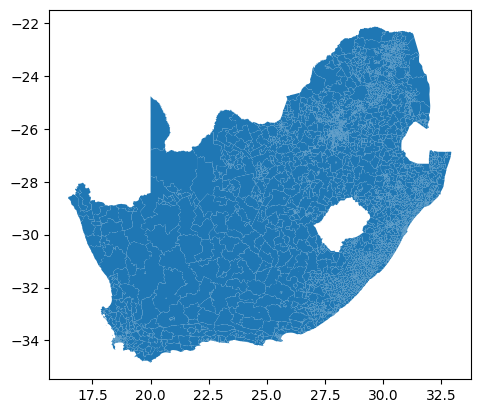

In [7]:
country_subdivisions.plot()

## Filter
Only retrieve region that we're interested in.

In [8]:
roi_shapefile = country_subdivisions[country_subdivisions[FILTER_KEY] == FILTER_VALUE]
roi_shapefile

,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,geometry
2895,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,"POLYGON ((27.85070 -26.47969, 27.85068 -26.481..."
2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,2,City of Johannesburg,JHB,2020-11-26,79800002,JHB_2,"POLYGON ((27.88070 -26.49284, 27.88087 -26.493..."
2897,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,3,City of Johannesburg,JHB,2020-11-26,79800003,JHB_3,"POLYGON ((27.87042 -26.46787, 27.87059 -26.470..."
2898,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,4,City of Johannesburg,JHB,2020-11-26,79800004,JHB_4,"POLYGON ((27.86958 -26.44910, 27.86958 -26.449..."
2899,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,5,City of Johannesburg,JHB,2020-11-26,79800005,JHB_5,"POLYGON ((27.81010 -26.42435, 27.81439 -26.425..."
...,...,...,...,...,...,...,...,...,...,...
3419,Gauteng,Rand West City Local Municipality,GT485,31,West Rand,DC48,2020-11-26,74805031,GT485_31,"POLYGON ((27.70118 -26.27900, 27.69996 -26.279..."
3420,Gauteng,Rand West City Local Municipality,GT485,32,West Rand,DC48,2020-11-26,74805032,GT485_32,"POLYGON ((27.74465 -26.27949, 27.73847 -26.282..."
3421,Gauteng,Rand West City Local Municipality,GT485,33,West Rand,DC48,2020-11-26,74805033,GT485_33,"POLYGON ((27.72198 -26.23594, 27.72473 -26.238..."
3422,Gauteng,Rand West City Local Municipality,GT485,34,West Rand,DC48,2020-11-26,74805034,GT485_34,"POLYGON ((27.69489 -26.28297, 27.69489 -26.283..."


<Axes: >

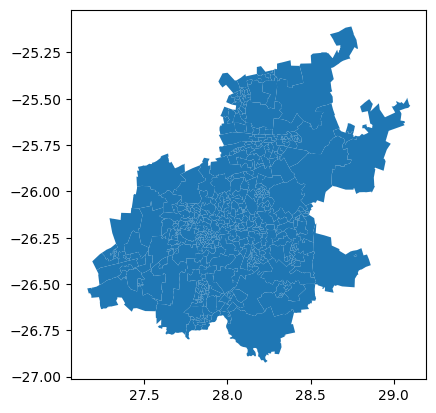

In [9]:
roi_shapefile.plot()

## Extract polygon and graph for each ward
Get outer polygon of region.

In [10]:
def dissolve_boundary(gdf):
    boundary = gdf[[DISSOLVE_BOUNDARY_KEY, 'geometry']]
    boundary = boundary.dissolve(by=DISSOLVE_BOUNDARY_KEY)
    # boundary.plot(facecolor="none")

    # Process with buffer so that artifacts are removed
    # Change projection so that buffer applied as expected
    # From geodetic coordinates (EPSG4326) to meters (3857) and back again
    processed_boundary = boundary.to_crs(crs=3857)
    processed_boundary['geometry'] = processed_boundary['geometry'].buffer(0.01).buffer(-0.01)
    processed_boundary = processed_boundary.to_crs(crs=boundary.crs)

    # processed_boundary.plot(facecolor="none")
    return processed_boundary


In [11]:
roi_shapefile

,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,geometry
2895,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,"POLYGON ((27.85070 -26.47969, 27.85068 -26.481..."
2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,2,City of Johannesburg,JHB,2020-11-26,79800002,JHB_2,"POLYGON ((27.88070 -26.49284, 27.88087 -26.493..."
2897,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,3,City of Johannesburg,JHB,2020-11-26,79800003,JHB_3,"POLYGON ((27.87042 -26.46787, 27.87059 -26.470..."
2898,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,4,City of Johannesburg,JHB,2020-11-26,79800004,JHB_4,"POLYGON ((27.86958 -26.44910, 27.86958 -26.449..."
2899,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,5,City of Johannesburg,JHB,2020-11-26,79800005,JHB_5,"POLYGON ((27.81010 -26.42435, 27.81439 -26.425..."
...,...,...,...,...,...,...,...,...,...,...
3419,Gauteng,Rand West City Local Municipality,GT485,31,West Rand,DC48,2020-11-26,74805031,GT485_31,"POLYGON ((27.70118 -26.27900, 27.69996 -26.279..."
3420,Gauteng,Rand West City Local Municipality,GT485,32,West Rand,DC48,2020-11-26,74805032,GT485_32,"POLYGON ((27.74465 -26.27949, 27.73847 -26.282..."
3421,Gauteng,Rand West City Local Municipality,GT485,33,West Rand,DC48,2020-11-26,74805033,GT485_33,"POLYGON ((27.72198 -26.23594, 27.72473 -26.238..."
3422,Gauteng,Rand West City Local Municipality,GT485,34,West Rand,DC48,2020-11-26,74805034,GT485_34,"POLYGON ((27.69489 -26.28297, 27.69489 -26.283..."


In [12]:
def skip_processed(entire_df: gpd.GeoDataFrame):
    existing_results = gpd.read_file(f'output/ward_results/{OUTPUT_SUB_FOLDER}.geojson')
    processed_wards = existing_results['ward_id']
    mask = entire_df["WardID"].isin(processed_wards)
    return entire_df[~mask]

In [13]:
# Entire region
# WardID, Dom_Language, Dom_Racial_group, Dom_LSM, Dom_Topo_Origin, Dom_Topo_Lang, Div_Language, Div_Racial_group, Div_LSM, Div_Topo_Origin, Div_Topo_Lang, Pop_Density
def plot_and_save_subdivisions(roi: gpd.GeoDataFrame, skip_saved: bool = True):
    to_process = roi
    if skip_saved:
        to_process = skip_processed(roi)
        print(f"Skipping {len(roi) - len(to_process)} already processed wards")
        
        
    for index, record in tqdm(to_process.iterrows(), total=to_process.shape[0]):
        ward_id = record["WardID"]
        
        try:
            gdf_record = roi.loc[[index]]
            ward_boundary = dissolve_boundary(gdf_record)
            polygon = ward_boundary.iloc[0]['geometry']
            grouped_by_dictionary_origin, grouped_by_language_origin = process_polygon(polygon=polygon,
                                                                                       address=ward_id,
                                                                                       edge_line_width=2, use_cache=True,
                                                                                       fig_size=(32, 32),
                                                                                       group_folder=OUTPUT_SUB_FOLDER,
                                                                                       save_timestamp=0)
            dominant_dictionary_origin = grouped_by_dictionary_origin.iloc[0]
            dominant_language_origin = grouped_by_language_origin.iloc[0]
            result = {
                "ward_id": ward_id,
                "dom_topo_origin": dominant_dictionary_origin["origin"],
                "dom_topo_origin%": dominant_dictionary_origin["%"],
                "dom_topo_lang": dominant_language_origin["origin"],
                "dom_topo_lang%": dominant_language_origin["%"],
                "geometry": polygon
            }
    
            df = gpd.GeoDataFrame(result, index=[0])
            
            # Write latest to file
            output_dir = f'output/ward_results'
            Path(output_dir).mkdir(exist_ok=True)
            output_file = Path(output_dir, f"{OUTPUT_SUB_FOLDER}.geojson")
            df.to_file(output_file, mode="a")
        except Exception as error:
            print(f"Error {ward_id}")
            raise error

In [14]:
# Hiding logs for ease of processing. If you want to debug something, remove the "HiddenPrint" wrapper
# Can rerun from scratch by passing skip_saved=False to the plot_and_save_subdivisions
with HiddenPrint():
    result_df = plot_and_save_subdivisions(roi_shapefile)    

0it [00:00, ?it/s]


In [15]:
final = gpd.read_file(f'output/ward_results/{OUTPUT_SUB_FOLDER}.geojson')
final

,ward_id,dom_topo_origin,dom_topo_origin%,dom_topo_lang,dom_topo_lang%,geometry
0,79800001,south_africa,51.310827,english,74.169051,"POLYGON ((27.82447 -26.47988, 27.82447 -26.479..."
1,79800002,south_africa,81.041226,english,23.337303,"POLYGON ((27.86441 -26.50479, 27.86441 -26.504..."
2,79800003,south_africa,76.825511,xhosa,24.957910,"POLYGON ((27.85066 -26.48357, 27.85066 -26.483..."
3,79800004,south_africa,53.339699,english,29.078474,"POLYGON ((27.83806 -26.45933, 27.83806 -26.459..."
4,79800005,south_africa,78.690164,english,32.239395,"POLYGON ((27.75924 -26.44466, 27.75924 -26.444..."
...,...,...,...,...,...,...
524,79900076,none,100.000000,none,100.000000,"POLYGON ((28.17667 -25.36414, 28.17667 -25.364..."
525,74201040,none,100.000000,none,100.000000,"POLYGON ((27.86993 -26.53053, 27.86993 -26.530..."
526,74804011,none,100.000000,none,100.000000,"POLYGON ((27.34560 -26.46433, 27.34560 -26.464..."
527,74805029,none,100.000000,none,100.000000,"POLYGON ((27.64123 -26.28234, 27.64123 -26.282..."


In [19]:
exclude_geo = final.drop('geometry', axis=1)
exclude_geo

,ward_id,dom_topo_origin,dom_topo_origin%,dom_topo_lang,dom_topo_lang%
0,79800001,south_africa,51.310827,english,74.169051
1,79800002,south_africa,81.041226,english,23.337303
2,79800003,south_africa,76.825511,xhosa,24.957910
3,79800004,south_africa,53.339699,english,29.078474
4,79800005,south_africa,78.690164,english,32.239395
...,...,...,...,...,...
524,79900076,none,100.000000,none,100.000000
525,74201040,none,100.000000,none,100.000000
526,74804011,none,100.000000,none,100.000000
527,74805029,none,100.000000,none,100.000000


In [20]:
exclude_geo.to_csv('~/Downloads/rough_ward_results_gauteng.csv')